# EDA, FE and Regression Model (Car Dekho Dataset)

## 1. EDA and FE
    1. Data Profiling
    2. Stastical analysis
    3. Graphical Analysis
    4. Data Cleaning
    5. Data Scaling
## 2. Linear Regression Model
    1. Linear Regression Model
    2. Performance metrics for above model
## 3. Ridge, Lasso and Elastic-Net Regression Model
    1. Ridge, Lasso and Elastic-Net Regression Model
    2. Performance metrics for above model
## 4. Decision Tree Regressor Model
    1. Decision Tree Regressor Model
    2. Performance metrics for above model
    3. Hyper-Parameter Tuning for above model
## 5. Support Vector Regressor Model
    1. Support Vector Regressor Model
    2. Performance metrics for above model
    3. Hyper-Parameter Tuning for above model
## 6. Random Forest Regressor Model
    1. Random Forest Regressor Model
    2. Performance metrics for above model
    3. Hyper-Parameter Tuning for above model


<h1 style="color: red;">1.0 Importing required libraries</h1>

In [2]:
import pandas as pd
import numpy as np
### Visualisation libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
### For Q-Q Plot
import scipy.stats as stats
### To ignore warnings
import warnings
warnings.filterwarnings('ignore')
### Machine Learning libraries
import sklearn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import r2_score
### To be able to see maximum columns on screen
pd.set_option('display.max_columns', 500)

<h1 style="color: red;">2.0 Performing descriptive analysis on dataset</h1>

In [3]:
dataset=pd.read_csv('cardekho_dataset.csv')
dataset.head()

,Unnamed: 0,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


#### selection of usefull column

In [4]:
columns_to_keep = [
    'car_name', 'brand', 'model', 'vehicle_age', 'km_driven',
    'seller_type', 'fuel_type', 'transmission_type',
    'mileage', 'engine', 'max_power', 'seats', 'selling_price'
]

dataset = dataset[columns_to_keep]
dataset.head()

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


## Feature Information
1. car_name: Car's Full name, which includes brand and specific model name.
2. brand: Brand Name of the particular car.
3. model: Exact model name of the car of a particular brand.
4. seller_type: Which Type of seller is selling the used car
5. fuel_type: Fuel used in the used car, which was put up on sale.
6. transmission_type: Transmission used in the used car, which was put on sale.
7. vehicle_age: The count of years since car was bought.
8. mileage: It is the number of kilometer the car runs per litre.
9. engine: It is the engine capacity in cc(cubic centimeters)
10. max_power: Max power it produces in BHP.
11. seats: Total number of seats in car.
12. selling_price: The sale price which was put up on website.

In [5]:
# getting null values and datatypes of all features
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15411 entries, 0 to 15410
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   car_name           15411 non-null  object 
 1   brand              15411 non-null  object 
 2   model              15411 non-null  object 
 3   vehicle_age        15411 non-null  int64  
 4   km_driven          15411 non-null  int64  
 5   seller_type        15411 non-null  object 
 6   fuel_type          15411 non-null  object 
 7   transmission_type  15411 non-null  object 
 8   mileage            15411 non-null  float64
 9   engine             15411 non-null  int64  
 10  max_power          15411 non-null  float64
 11  seats              15411 non-null  int64  
 12  selling_price      15411 non-null  int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 1.5+ MB


In [6]:
### getting info about features
dataset.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
car_name,15411,121,Hyundai i20,906,NaN,NaN,NaN,NaN,NaN,NaN,NaN
brand,15411,32,Maruti,4992,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model,15411,120,i20,906,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vehicle_age,15411.0,NaN,NaN,NaN,6.036338,3.013291,0.0,4.0,6.0,8.0,29.0
km_driven,15411.0,NaN,NaN,NaN,55616.480631,51618.548422,100.0,30000.0,50000.0,70000.0,3800000.0
seller_type,15411,3,Dealer,9539,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fuel_type,15411,5,Petrol,7643,NaN,NaN,NaN,NaN,NaN,NaN,NaN
transmission_type,15411,2,Manual,12225,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mileage,15411.0,NaN,NaN,NaN,19.701151,4.171265,4.0,17.0,19.67,22.7,33.54
engine,15411.0,NaN,NaN,NaN,1486.057751,521.106696,793.0,1197.0,1248.0,1582.0,6592.0


In [7]:
### checking duplicate values
dataset.duplicated().sum()

167

In [8]:
### dropping duplicate values
dataset.drop_duplicates(inplace=True)

In [9]:
### checking duplicate values after dropping duplicates
dataset.duplicated().sum()

0

<h1 style="color: orange;">3.0 Getting Categorical and Numerical features</h1>

In [10]:
### getting count of features
categorical_features=[feature for feature in dataset.columns if dataset[feature].dtypes == 'O']
print("There are {} categorical features namely: {}\n".format(len(categorical_features),categorical_features))
numerical_features=[feature for feature in dataset.columns if dataset[feature].dtypes != 'O']
print("There are {} numerical features namely: {}".format(len(numerical_features),numerical_features))

There are 6 categorical features namely: ['car_name', 'brand', 'model', 'seller_type', 'fuel_type', 'transmission_type']

There are 7 numerical features namely: ['vehicle_age', 'km_driven', 'mileage', 'engine', 'max_power', 'seats', 'selling_price']


In [11]:
### Getting count of categories in each features
for feature in categorical_features:
 print("The {} feature has '{}' no. of different categories".format(feature, dataset[feature].nunique()))

The car_name feature has '121' no. of different categories
The brand feature has '32' no. of different categories
The model feature has '120' no. of different categories
The seller_type feature has '3' no. of different categories
The fuel_type feature has '5' no. of different categories
The transmission_type feature has '2' no. of different categories


In [12]:
### top 10 categories in each feature percent wise
for feature in categorical_features:
    value_counts = dataset[feature].value_counts(normalize=True) * 100
    top_values = value_counts[:10]
    print(f"Top values for {feature}:")
    print(top_values)
    print("********************************")


Top values for car_name:
car_name
Hyundai i20           5.890842
Maruti Swift Dzire    5.739963
Maruti Swift          5.077408
Maruti Alto           5.038048
Honda City            4.919969
Maruti Wagon R        4.651010
Hyundai Grand         3.732616
Toyota Innova         3.568617
Hyundai Verna         3.201260
Hyundai i10           2.663343
Name: proportion, dtype: float64
********************************
Top values for brand:
brand
Maruti        32.360273
Hyundai       19.364996
Honda          9.682498
Mahindra       6.553398
Toyota         5.175807
Ford           5.090527
Volkswagen     4.027814
Renault        3.457098
BMW            2.860142
Tata           2.761742
Name: proportion, dtype: float64
********************************
Top values for model:
model
i20            5.890842
Swift Dzire    5.739963
Swift          5.077408
Alto           5.038048
City           4.919969
Wagon R        4.651010
Grand          3.732616
Innova         3.568617
Verna          3.201260
i10         

<h2 style="color: orange;">3.1 count of car  sell with respect to their brand</h2>

In [13]:
pd.DataFrame(dataset.groupby('brand')['brand'].count().sort_values(ascending=False)).rename(columns={'brand':' Car Count'})

,Car Count
brand,
Maruti,4933
Hyundai,2952
Honda,1476
Mahindra,999
Toyota,789
Ford,776
Volkswagen,614
Renault,527
BMW,436


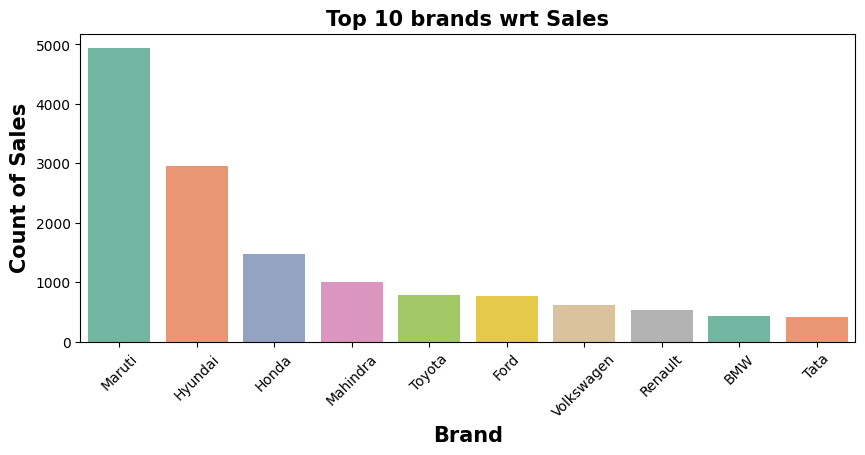

In [14]:
### Top 10 brands wrt sales
custom_palette = sns.color_palette("Set2")
plt.figure(figsize=(10,4))
sns.barplot(y=dataset['brand'].value_counts()[:10], x=dataset['brand'].value_counts().index[:10], palette=custom_palette)
plt.ylabel('Count of Sales', fontsize=15, fontweight='bold')
plt.xlabel("Brand",fontsize=15, fontweight='bold')
plt.xticks(rotation=45)
plt.title("Top 10 brands wrt Sales",fontsize=15, fontweight='bold')
plt.show()

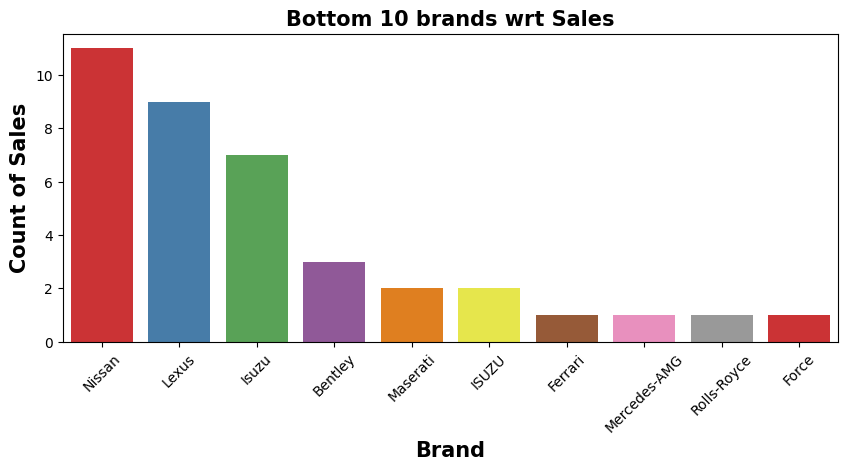

In [15]:
### Bottom 10 brands wrt sales
custom_palette = sns.color_palette("Set1")
plt.figure(figsize=(10,4))
sns.barplot(y=dataset['brand'].value_counts()[-10:], x=dataset['brand'].value_counts().index[-10:],palette=custom_palette)
plt.ylabel('Count of Sales', fontsize=15, fontweight='bold')
plt.xlabel("Brand",fontsize=15, fontweight='bold')
plt.xticks(rotation=45)
plt.title("Bottom 10 brands wrt Sales",fontsize=15, fontweight='bold')
plt.show();


<h2 style="color: orange;">3.2 count of car  sell with respect to their car name</h2>

In [16]:
### Top 10 Cars
pd.DataFrame(dataset.groupby('car_name')['car_name'].count().sort_values(ascending=False)[:10]).rename(columns={'car_name':'Car count'})

,Car count
car_name,
Hyundai i20,898
Maruti Swift Dzire,875
Maruti Swift,774
Maruti Alto,768
Honda City,750
Maruti Wagon R,709
Hyundai Grand,569
Toyota Innova,544
Hyundai Verna,488


In [17]:
### Bottom 10 Cars
pd.DataFrame(dataset.groupby('car_name')['car_name'].count().sort_values(ascending=False)[-10:]).rename(columns={'car_name':'Car count'})

,Car count
car_name,
ISUZU MUX,2
Isuzu MUX,1
Hyundai Aura,1
Mercedes-AMG C,1
Maserati Quattroporte,1
Maserati Ghibli,1
Rolls-Royce Ghost,1
Ferrari GTC4Lusso,1
Force Gurkha,1


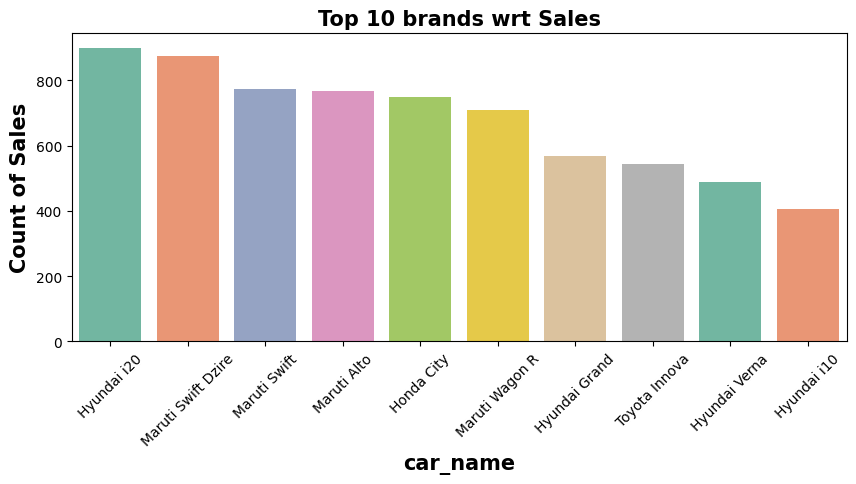

In [18]:
### Top 10 car name wrt sales
custom_palette = sns.color_palette("Set2")
plt.figure(figsize=(10,4))
sns.barplot(y=dataset['car_name'].value_counts()[:10], x=dataset['car_name'].value_counts().index[:10], palette=custom_palette)
plt.ylabel('Count of Sales', fontsize=15, fontweight='bold')
plt.xlabel("car_name",fontsize=15, fontweight='bold')
plt.xticks(rotation=45)
plt.title("Top 10 brands wrt Sales",fontsize=15, fontweight='bold')
plt.show()

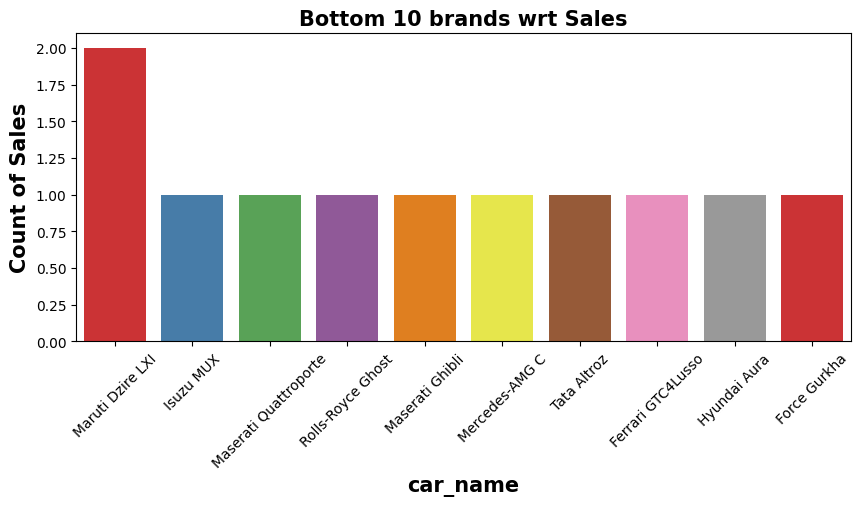

In [27]:
### Bottom 10 car name wrt sales
custom_palette = sns.color_palette("Set1")
plt.figure(figsize=(10,4))
sns.barplot(y=dataset['car_name'].value_counts()[-10:], x=dataset['car_name'].value_counts().index[-10:], palette=custom_palette)
plt.ylabel('Count of Sales', fontsize=15, fontweight='bold')
plt.xlabel("car_name",fontsize=15, fontweight='bold')
plt.xticks(rotation=45)
plt.title("Bottom 10 brands wrt Sales",fontsize=15, fontweight='bold')
plt.show()

<h2 style="color: blue;">Observation</h2>

1. Maruti has most no of sales followed by hyundai and honda.
2. Whereas force, Rolls-royce, ferrari and Mercedes_AMG have least no. of sales.
3. Hyundai i20 is highest selling car followed by Swift dezire and swift.
4. Whereas force Gurkha, Hyundai aura, ferrari GTC4Lusso ,etc are least selling cars.


<h2 style="color: orange;">3.3  Brands and Cars wrt Total Selling Price</h2>

In [22]:
### Brands wrt Total Selling Price
pd.DataFrame(dataset.groupby('brand')['selling_price'].sum().sort_values(ascending=False)).rename(columns={'selling_price':'Total selling Price'})

,Total selling Price
brand,
Maruti,2402298875
Hyundai,1701766000
BMW,1171390000
Toyota,1082111000
Honda,911360000
Mercedes-Benz,823437000
Mahindra,787825000
Ford,491764000
Audi,374443000


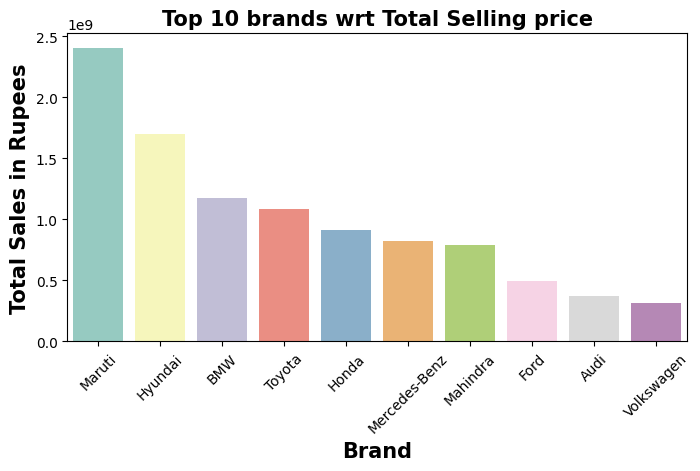

In [26]:
### Top 10 brands
custom_palette = sns.color_palette("Set3")
plt.figure(figsize=(8,4))
sns.barplot(y=dataset.groupby('brand')['selling_price'].sum().sort_values(ascending=False)[:10],
 x=dataset.groupby('brand')['selling_price'].sum().sort_values(ascending=False).index[:10],palette=custom_palette)
plt.ylabel('Total Sales in Rupees',fontsize=15, fontweight='bold')
plt.xlabel("Brand",fontsize=15, fontweight='bold')
plt.xticks(rotation=45)
plt.title("Top 10 brands wrt Total Selling price",fontsize=15, fontweight='bold')
plt.show();

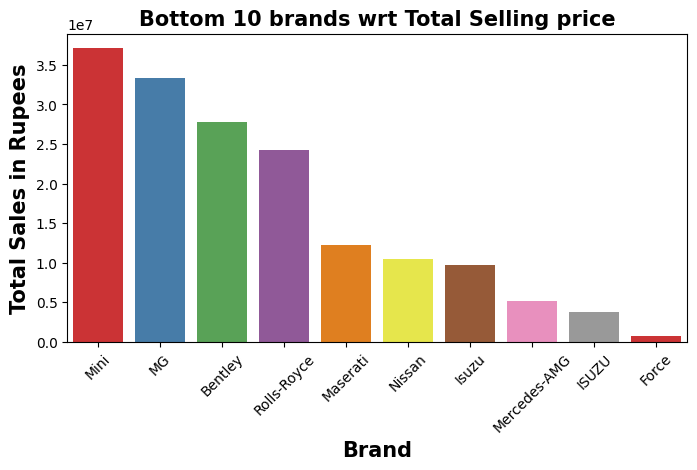

In [28]:
### Bottom 10 brands
custom_palette = sns.color_palette("Set1")
plt.figure(figsize=(8,4))
sns.barplot(y=dataset.groupby('brand')['selling_price'].sum().sort_values(ascending=False)[-10:],
 x=dataset.groupby('brand')['selling_price'].sum().sort_values(ascending=False).index[-10:],palette=custom_palette)
plt.ylabel('Total Sales in Rupees',fontsize=15, fontweight='bold')
plt.xlabel("Brand",fontsize=15, fontweight='bold')
plt.xticks(rotation=45)
plt.title("Bottom 10 brands wrt Total Selling price",fontsize=15, fontweight='bold')
plt.show();